In [42]:
import os
os.chdir('../..')
import numpy as np
import torch
import pickle
from tqdm import tqdm
from rdkit.Chem import MolFromInchi
from rdkit.Chem.rdmolops import Kekulize


In [5]:
from molgrad.utils import DATA_PATH, EXAMPLE_PATH, MODELS_PATH
from molgrad.vis import molecule_importance
from molgrad.net import MPNNPredictor
from molgrad.train import DEVICE

os.makedirs(EXAMPLE_PATH, exist_ok=True)

In [6]:
with open(os.path.join(DATA_PATH, 'caco2', 'data_caco2.pt'), 'rb') as handle:
    inchis, values = pickle.load(handle)


with open(os.path.join(DATA_PATH, 'caco2', 'sim_caco2.pt'), 'rb') as handle:
    sim = pickle.load(handle)

preds = np.load(os.path.join(DATA_PATH, 'caco2', 'preds.npy'))
diff_true = np.load(os.path.join(DATA_PATH, 'caco2', 'diff_exp.npy'))
diff_hat = np.load(os.path.join(DATA_PATH, 'caco2', 'diff_hat.npy'))

In [7]:
ligand_i = []
ligand_j = []
values_i = []
values_j = []
preds_i = []
preds_j = []

long_sim = []
long_true = []
long_hat = []

for idx_i, (inchi_i, exp_i, pred_i) in enumerate(zip(inchis, values, preds)):
    for idx_j, (inchi_j, exp_j, pred_j) in enumerate(zip(inchis, values, preds)):
        if idx_i < idx_j:
            ligand_i.append(inchi_i)
            ligand_j.append(inchi_j)
            values_i.append(exp_i)
            values_j.append(exp_j)
            preds_i.append(pred_i)
            preds_j.append(pred_j)
            long_sim.append(sim[idx_i, idx_j])
            long_true.append(diff_true[idx_i, idx_j])
            long_hat.append(diff_hat[idx_i, idx_j])

In [29]:
import pandas as pd
pd.set_option('display.max_rows', 1000)

df_pairs = pd.DataFrame({'inchi_i': ligand_i,
                         'inchi_j': ligand_j,
                         'values_i': values_i,
                         'values_j': values_j,
                         'preds_i': preds_i,
                         'preds_j': preds_j,
                         'similarity': long_sim,
                         'diff_exp': long_true,
                         'diff_pred': long_hat})


In [30]:
def sali_index(sim, diff):
    return np.abs(diff) / (1 - sim)

In [31]:
df_pairs = df_pairs.loc[df_pairs['similarity'] < 1.0]
df_pairs['sali_exp'] = sali_index(df_pairs['similarity'], df_pairs['diff_exp'])
df_pairs['sali_pred'] = sali_index(df_pairs['similarity'], df_pairs['diff_pred'])
df_pairs.sort_values('sali_pred', ascending=False, inplace=True)
df_pairs.reset_index(inplace=True)

In [32]:
df_pairs.head(n=400)

,index,inchi_i,inchi_j,values_i,values_j,preds_i,preds_j,similarity,diff_exp,diff_pred,sali_exp,sali_pred
0,4090,InChI=1/C15H10O5/c16-9-3-1-8(2-4-9)11-7-20-13-...,InChI=1/C14H10N2O6/c17-11-3-1-7(5-9(11)13(19)2...,3.866461,7.795880,3.993170,7.405926,0.234043,-3.929419,-3.412756,5.130075,4.455542
1,9794,InChI=1/C10H7N3S/c1-2-4-8-7(3-1)12-10(13-8)9-5...,InChI=1/C14H10N2O6/c17-11-3-1-7(5-9(11)13(19)2...,3.774691,7.795880,3.544789,7.405926,0.133333,-4.021189,-3.861138,4.639834,4.455159
2,20120,InChI=1/C14H10N2O6/c17-11-3-1-7(5-9(11)13(19)2...,InChI=1S/C15H11ClN2O2/c16-10-6-7-12-11(8-10)13...,7.795880,4.238200,7.405926,3.788049,0.181818,3.557680,3.617877,4.348275,4.421850
3,9823,InChI=1/C10H7N3S/c1-2-4-8-7(3-1)12-10(13-8)9-5...,InChI=1S/C18H18N8O7S3/c1-25-18(22-12(28)13(29)...,3.774691,6.885000,3.544789,7.404294,0.084615,-3.110309,-3.859506,3.397817,4.216267
4,9763,InChI=1/C10H7N3S/c1-2-4-8-7(3-1)12-10(13-8)9-5...,InChI=1/C25H27N9O8S2/c1-3-32-8-9-33(21(39)20(3...,3.774691,6.534617,3.544789,7.354390,0.086093,-2.759926,-3.809601,3.019919,4.168477
5,9789,InChI=1/C10H7N3S/c1-2-4-8-7(3-1)12-10(13-8)9-5...,InChI=1/C18H19N3O6S.2H2O/c1-9(22)27-7-11-8-28-...,3.774691,6.573489,3.544789,7.077326,0.152381,-2.798798,-3.532538,3.301953,4.167601
6,20117,InChI=1/C14H10N2O6/c17-11-3-1-7(5-9(11)13(19)2...,InChI=1S/C18H19N3O/c1-12-19-9-10-21(12)11-13-7...,7.795880,3.960000,7.405926,3.905416,0.149533,3.835880,3.500510,4.510320,4.115984
7,6884,InChI=1/C18H19N3O/c1-12-19-9-10-21(12)11-13-7-...,InChI=1/C14H10N2O6/c17-11-3-1-7(5-9(11)13(19)2...,3.958607,7.795880,3.905416,7.405926,0.149533,-3.837273,-3.500510,4.511958,4.115984
8,359,InChI=1/C8H9NO2/c1-6(10)9-7-2-4-8(11)5-3-7/h2-...,InChI=1/C14H10N2O6/c17-11-3-1-7(5-9(11)13(19)2...,4.000000,7.795880,4.190055,7.405926,0.216216,-3.795880,-3.215871,4.843019,4.103008
9,13796,InChI=1/C25H27N9O8S2/c1-3-32-8-9-33(21(39)20(3...,InChI=1S/C15H11ClN2O2/c16-10-6-7-12-11(8-10)13...,6.534617,4.238200,7.354390,3.788049,0.125786,2.296417,3.566340,2.626837,4.079483


In [75]:
model_pt = os.path.join(MODELS_PATH, 'caco2_noHs.pt')

from molgrad.net import MPNNPredictor

model = MPNNPredictor(node_in_feats=49,
                      edge_in_feats=10,
                      global_feats=4,
                      n_tasks=1).to(DEVICE) 
model.load_state_dict(torch.load(model_pt,
                                 map_location=DEVICE))

<All keys matched successfully>

In [76]:
inchi_i, inchi_j = df_pairs.loc[44, 'inchi_i'], df_pairs.loc[44, 'inchi_j']
mol_i, mol_j = MolFromInchi(inchi_i), MolFromInchi(inchi_j)

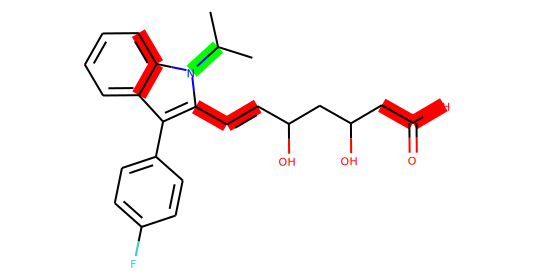

In [77]:
svg, img, _, _, global_importance = molecule_importance(mol_i,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-3,
                                                      img_height=275,
                                                      img_width=550,
                                                      addHs=False)
img

In [78]:
with open(os.path.join(EXAMPLE_PATH, "caco2_cliff_one_neg.svg"), "w+") as handle:
    handle.write(svg)

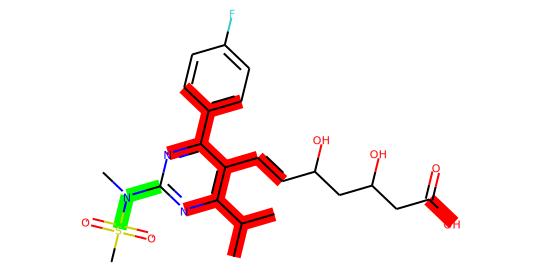

In [79]:
svg, img, _, _, global_importance = molecule_importance(mol_j,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-3,
                                                      img_height=275,
                                                      img_width=550,
                                                      addHs=False)
img

In [80]:
with open(os.path.join(EXAMPLE_PATH, "caco2_cliff_one_pos.svg"), "w+") as handle:
    handle.write(svg)